In [6]:
import matplotlib.pyplot as plt
from main import FireSimulator
from matplotlib.colors import ListedColormap

In [3]:
simulations = 100
final_simulations = []
for i in range(simulations):
    sim = FireSimulator(
        n=50,
        m=50,
        lam=5/100,# 5 m/min / 100m,
        lam_o= 1/240, # 1/120 min,
        ignition_site=(25, 25) )
    final_time, steps = sim.run()
    final_simulations.append(sim.grid)

In [11]:
# Normalize arrays: 2 -> 1
normalized_simulations = [
    [[1 if cell > 0 else 0 for cell in row] for row in sim]
    for sim in final_simulations ]

# Get the size of the landscape
rows = len(normalized_simulations[0])
cols = len(normalized_simulations[0][0])

# Initialize sum map
burn_sum = [[0]*cols for _ in range(rows)]

# Sum over all simulations
for sim in normalized_simulations:
    for i in range(rows):
        for j in range(cols):
            burn_sum[i][j] += sim[i][j]

num_simulations = len(normalized_simulations)
burn_probability = [
    [burn_sum[i][j] / num_simulations for j in range(cols)]
    for i in range(rows)
]

# burn_probability[i][j] now contains the probability that cell (i,j) burned

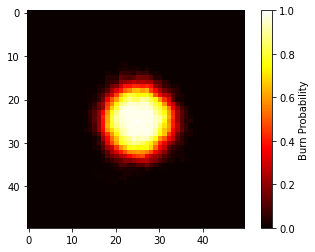

In [12]:
plt.imshow(burn_probability, cmap='hot', interpolation='nearest')
plt.colorbar(label='Burn Probability')
plt.show()